In [1]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models'
import sys
sys.path.append(path_) 

# Regresor

In [2]:
from sklearn.linear_model import ElasticNet
from base_regressor import BaseRegressor
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer

class ElasticNetRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="ElasticNet"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = ElasticNet
        if params is None:
            self.params = {
                'alpha': 0.2,
                'l1_ratio': 0.5,  # Proporción de L1 en la regularización
                'max_iter': 10000,
                # 'tol': 0.001
            }
        if params_space is None:
            self.params_space = {
                'alpha': Real(0.001, 0.5, prior='log-uniform'),
                'l1_ratio': Real(0.0, 1.0),  # Rango de 0 a 1 para la proporción de L1
                'max_iter': Integer(100, 1000),
                'tol': Real(1e-5, 1e-2, prior='log-uniform')
            }


c:\python_env\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Clasificador

In [3]:
from base_classifier import BaseClassifier
from skopt.space import Real, Categorical, Integer
import xgboost as xgb

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import StratifiedKFold


class XGBoostClassifier(BaseClassifier):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = xgb.XGBClassifier
        if params is None:
            self.params = {
            'objective': 'binary:logistic',  # Clasificación binaria
            'eval_metric': 'logloss',       # Métrica de evaluación
            'learning_rate': 0.1,           # Tasa de aprendizaje
            'max_depth': 6,                 # Profundidad máxima del árbol
            'subsample': 0.8,               # Proporción de muestras utilizadas por árbol
            'colsample_bytree': 0.8,        # Proporción de características utilizadas por árbol
            'reg_alpha': 0.1,               # Regularización L1
            'reg_lambda': 1.0,              # Regularización L2
            'gamma': 0.0,                   # Mínima reducción de pérdida para crear una división
            'min_child_weight': 1,          # Mínimo peso de la suma de los hijos para una división
            'n_estimators': 100,            # Número de árboles en el modelo
            'scale_pos_weight': 1.0         # Para datos desbalanceados
        }
        if params_space is None:
            self.params_space = {
                'objective'   : ['binary:logistic'],
                'eval_metric' : ['logloss', 'error', 'auc', 'aucpr'],
                'learning_rate': (0.01, 0.1, 0.2),
                'max_depth': (3, 4, 5),
                'subsample': (0.8, 0.9, 1.0),
                'colsample_bytree': (0.8, 0.9, 1.0),
                'reg_alpha': (0, 0.1, 1.0),
                'reg_lambda': (0, 0.1, 1.0),
                #'gamma': (0.001, 0.01, 0.1, 1, 10),
            }

# Instancia de Modelos

In [26]:
from Plotter import Plotter
from sklearn.preprocessing import MinMaxScaler,StandardScaler

model_reg = ElasticNetRegressor()

Plotters = Plotter()

# Parametros de Plot
colorset = 'darkorange'
nameset = 'ElasticNet'

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler_reg_train=2

#scaler = MinMaxScaler()
Scaler_reg = StandardScaler()

model_cls = XGBoostClassifier()


In [5]:
#72 features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

In [5]:
# Features Selection
features = ['TF_INS_left', 'Low_subj_spec_EPP_CING_left', 'TF_SFG_right', 'Low_subj_spec_EPP_CING_right', 'TF_SFG_left', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'TF_IFG_left', 'TF_MFG_right', 'TF_MFG_left', 'Low_subj_spec_EPP_HPC_right', 'IAF_ORB_left', 'TF_ORB_left', 'IAF_SFG_right', 'Low_subj_spec_EPP_HPC_left', 'IAF_MFG_right', 'TF_INS_right', 'IAF_MFG_left', 'IAF_SFG_left', 'TF_ORB_right', 'Low_subj_spec_EPP_OCC_right', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'TF_IFG_right', 'TF_HPC_right', 'IAF_INS_right', 'TF_HPC_left', 'IAF_INS_left', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'Alpha2_canon_EPP_OCC_right', 'IAF_OCC_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_RPD_CING_right', 'High_subj_spec_RPD_OCC_right', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_EPP_CING_right', 'Low_subj_spec_RPD_OCC_right', 'Low_subj_spec_RPD_OCC_left', 'Alpha2_canon_RPD_CING_left', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_RPD_PARIET_left', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_EPP_CING_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_RPD_PARIET_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_HPC_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_EPP_PARIET_right', 'Low_subj_spec_RPD_PARIET_right']

In [60]:
features =['TF_HPC_right', 'TF_HPC_left', 'High_subj_spec_EPP_PARIET_right', 'IAF_ORB_left', 'TF_INS_right', 'TF_ORB_right', 'High_subj_spec_RPD_PARIET_right', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_RPD_OCC_right', 'Alpha2_canon_RPD_CING_right', 'High_subj_spec_RPD_CING_left', 'TF_IFG_right', 'Low_subj_spec_EPP_OCC_right', 'Alpha2_canon_RPD_PARIET_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Alpha2_canon_RPD_CING_left', 'High_subj_spec_EPP_CING_right', 'IAF_OCC_left', 'Low_subj_spec_RPD_PARIET_right', 'Alpha2_canon_RPD_PARIET_left', 'IAF_OCC_right', 'High_subj_spec_EPP_CING_left', 'Low_subj_spec_RPD_CING_right', 'Alpha2_canon_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_left', 'Low_subj_spec_RPD_CING_left']

In [83]:
len(features)

72

# Data

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle


file_path_CN = f'{path}Brain_Age_Clock/data_freq/CN_freq.xlsx'
file_path_AD = f'{path}Brain_Age_Clock/data_freq/AD_freq.xlsx'
file_path_FTD = f'{path}Brain_Age_Clock/data_freq/FTD_freq.xlsx'
file_path_MCI = f'{path}Brain_Age_Clock/data_freq/MCI_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)
df_AD = pd.read_excel(file_path_AD)
df_FTD = pd.read_excel(file_path_FTD)
df_MCI = pd.read_excel(file_path_MCI)

regiones = ["America", "Turquia", "Europa"]
countrys =  ["Chile", "Argentina", "Colombia", "Brasil", "Turquia", "Reino Unido", "Grecia", "Irlanda"]

df_CN_filtrado = df_CN[(df_CN['Age'] >=50) & (df_CN['Age'] <= 90)].reset_index(drop=True)
#df_CN_filtrado = df_CN_filtrado[df_CN_filtrado["Region"].isin(regiones)] # Se saca Turquia

df_CN_filtrado = df_CN_filtrado[df_CN_filtrado["Country_unique"].isin(countrys)] # Se saca Turquia

df_AD_filtrado = df_AD[(df_AD['Age'] >= 50) & (df_AD['Age'] <= 90)].reset_index(drop=True)
df_FTD_filtrado = df_FTD[(df_FTD['Age'] >= 50) & (df_FTD['Age'] <= 90)].reset_index(drop=True)
df_MCI_filtrado = df_MCI[(df_MCI['Age'] >= 50) & (df_MCI['Age'] <= 90)].reset_index(drop=True)


In [23]:

X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID_unique"]

X_AD = df_AD_filtrado[features]
y_AD = df_AD_filtrado["Age"]
ID_AD = df_AD_filtrado["ID_unique"]

X_FTD = df_FTD_filtrado[features]
y_FTD = df_FTD_filtrado["Age"]
ID_FTD = df_FTD_filtrado["ID_unique"]

X_MCI = df_MCI_filtrado[features]
y_MCI = df_MCI_filtrado["Age"]
ID_MCI = df_MCI_filtrado["ID_unique"]

# Modelo de Regresion

In [8]:
params_ = {'alpha': 0.01,
            'l1_ratio': 1.0,
            'max_iter': 1000,
            'tol': 0.01}

In [ ]:
results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test= model_reg.trainer(
        X=X_CN,
        y=y_CN,
        ID_label='ID_unique',
        ID=ID_CN,
        n_splits=10,
        n_iterations=20,
        params_= params_)

In [ ]:
results_labels_df_AD_test, results_per_fold_AD_test, df_AD_avg_test = model_reg.test(X=X_AD, y=y_AD, ID= ID_AD, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model)
results_labels_df_FTD_test, results_per_fold_FTD_test, df_FTD_avg_test = model_reg.test(X=X_FTD, y=y_FTD, ID= ID_FTD, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model)
results_labels_df_MCI_test, results_per_fold_MCI_test, df_MCI_avg_test = model_reg.test(X=X_MCI, y=y_MCI, ID= ID_MCI, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model)


In [ ]:
df_CN_seleccion = df_CN_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_combined = df_CN_avg_test.merge(df_CN_seleccion, on='ID_unique', how='left')

df_AD_seleccion = df_AD_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_AD_combined = df_AD_avg_test.merge(df_AD_seleccion, on='ID_unique', how='left')

df_FTD_seleccion = df_FTD_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'GINI', 'ODQ']]
df_FTD_combined = df_FTD_avg_test.merge(df_FTD_seleccion, on='ID_unique', how='left')

df_MCI_seleccion = df_MCI_filtrado[['ID_unique', 'Country_unique', 'Region','Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_MCI_combined = df_MCI_avg_test.merge(df_MCI_seleccion, on='ID_unique', how='left')



# Incremento Acumulativo

In [30]:
params_ = {'alpha': 0.1,
            'l1_ratio': 1.0,
            'max_iter': 1000,
            'tol': 0.01}

In [31]:
features

['TF_INS_left',
 'Low_subj_spec_EPP_CING_left',
 'TF_SFG_right',
 'Low_subj_spec_EPP_CING_right',
 'TF_SFG_left',
 'Low_subj_spec_EPP_PARIET_left',
 'Low_subj_spec_EPP_PARIET_right',
 'Low_subj_spec_EPP_OCC_left',
 'TF_IFG_left',
 'TF_MFG_right',
 'TF_MFG_left',
 'Low_subj_spec_EPP_HPC_right',
 'IAF_ORB_left',
 'TF_ORB_left',
 'IAF_SFG_right',
 'Low_subj_spec_EPP_HPC_left',
 'IAF_MFG_right',
 'TF_INS_right',
 'IAF_MFG_left',
 'IAF_SFG_left',
 'TF_ORB_right',
 'Low_subj_spec_EPP_OCC_right',
 'IAF_ORB_right',
 'IAF_IFG_left',
 'IAF_IFG_right',
 'TF_IFG_right',
 'TF_HPC_right',
 'IAF_INS_right',
 'TF_HPC_left',
 'IAF_INS_left',
 'IAF_HPC_left',
 'IAF_HPC_right',
 'IAF_OCC_left',
 'Alpha2_canon_RPD_OCC_right',
 'Alpha2_canon_EPP_OCC_right',
 'IAF_OCC_right',
 'Alpha2_canon_EPP_OCC_left',
 'Alpha2_canon_RPD_OCC_left',
 'Alpha2_canon_EPP_HPC_left',
 'Alpha2_canon_RPD_HPC_left',
 'Alpha2_canon_RPD_HPC_right',
 'Alpha2_canon_EPP_HPC_right',
 'Alpha2_canon_RPD_CING_right',
 'High_subj_spec_RPD_

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Crear listas para almacenar resultados
results_GAP_corrected = {}
evaluation_metrics = []

# Inicializar lista para almacenar las características de forma acumulativa
accumulated_features = []

# Iterar sobre las características de forma sumativa
for feature in reversed(features):
    # Agregar la característica actual a la lista acumulada
    accumulated_features.append(feature)
    
    # Filtrar conjuntos de datos para incluir las características acumuladas
    X_CN_filtered = X_CN[accumulated_features]
    X_AD_filtered = X_AD[accumulated_features]
    X_FTD_filtered = X_FTD[accumulated_features]
    X_MCI_filtered = X_MCI[accumulated_features]
    
    # Entrenar el modelo en controles
    results_labels_df_CN_train, results_labels_df_CN_test, results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test = model_reg.trainer(
        X=X_CN_filtered, y=y_CN, ID_label='ID_unique', ID=ID_CN, n_splits=10, n_iterations=20, params_=params_
    )

    # Evaluar el modelo en los otros grupos
    results_labels_df_AD_test, results_per_fold_AD_test, df_AD_avg_test = model_reg.test(
        X=X_AD_filtered, y=y_AD, ID=ID_AD, ID_label='ID_unique', n_splits=10, n_iterations=20, result_model=results_model
    )
    results_labels_df_FTD_test, results_per_fold_FTD_test, df_FTD_avg_test = model_reg.test(
        X=X_FTD_filtered, y=y_FTD, ID=ID_FTD, ID_label='ID_unique', n_splits=10, n_iterations=20, result_model=results_model
    )
    results_labels_df_MCI_test, results_per_fold_MCI_test, df_MCI_avg_test = model_reg.test(
        X=X_MCI_filtered, y=y_MCI, ID=ID_MCI, ID_label='ID_unique', n_splits=10, n_iterations=20, result_model=results_model
    )

    # Extraer y guardar la columna 'GAP_corrected'
    results_GAP_corrected[", ".join(accumulated_features)] = {
        'CN_train': df_CN_avg_train['GAP_corrected'],
        'CN_test': df_CN_avg_test['GAP_corrected'],
        'AD_test': df_AD_avg_test['GAP_corrected'],
        'FTD_test': df_FTD_avg_test['GAP_corrected'],
        'MCI_test': df_MCI_avg_test['GAP_corrected'],
    }

    # Calcular y guardar métricas de evaluación (MAE y R2)
    metrics = {
        'features': ", ".join(accumulated_features),
        'CN_train_MAE': mean_absolute_error(df_CN_avg_train['y_labels'], df_CN_avg_train['y_pred']),
        'CN_train_R2': r2_score(df_CN_avg_train['y_labels'], df_CN_avg_train['y_pred']),
        'CN_test_MAE': mean_absolute_error(df_CN_avg_test['y_labels'], df_CN_avg_test['y_pred']),
        'CN_test_R2': r2_score(df_CN_avg_test['y_labels'], df_CN_avg_test['y_pred']),
        'AD_test_MAE': mean_absolute_error(df_AD_avg_test['y_labels'], df_AD_avg_test['y_pred']),
        'AD_test_R2': r2_score(df_AD_avg_test['y_labels'], df_AD_avg_test['y_pred']),
        'FTD_test_MAE': mean_absolute_error(df_FTD_avg_test['y_labels'], df_FTD_avg_test['y_pred']),
        'FTD_test_R2': r2_score(df_FTD_avg_test['y_labels'], df_FTD_avg_test['y_pred']),
        'MCI_test_MAE': mean_absolute_error(df_MCI_avg_test['y_labels'], df_MCI_avg_test['y_pred']),
        'MCI_test_R2': r2_score(df_MCI_avg_test['y_labels'], df_MCI_avg_test['y_pred']),
    }
    evaluation_metrics.append(metrics)

# Convertir resultados de métricas a un dataframe
evaluation_metrics_df = pd.DataFrame(evaluation_metrics)

# Guardar resultados
results_GAP_corrected_df = {key: pd.DataFrame(value) for key, value in results_GAP_corrected.items()}


In [32]:
from sklearn.metrics import mean_absolute_error, r2_score

# Crear listas para almacenar resultados
results_GAP_corrected = {}
evaluation_metrics = []
region_results = []

# Inicializar lista para almacenar las características de forma acumulativa
accumulated_features = []

# Iterar sobre las características de forma sumativa
for feature in reversed(features):
    # Agregar la característica actual a la lista acumulada
    accumulated_features.append(feature)
    
    # Filtrar conjuntos de datos para incluir las características acumuladas
    X_CN_filtered = X_CN[accumulated_features]
    X_AD_filtered = X_AD[accumulated_features]
    X_FTD_filtered = X_FTD[accumulated_features]
    X_MCI_filtered = X_MCI[accumulated_features]
    
    # Entrenar el modelo en controles
    results_labels_df_CN_train, results_labels_df_CN_test, results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test = model_reg.trainer(
        X=X_CN_filtered, y=y_CN, ID_label='ID_unique', ID=ID_CN, n_splits=10, n_iterations=20, params_=params_
    )

    # Evaluar el modelo en los otros grupos
    results_labels_df_AD_test, results_per_fold_AD_test, df_AD_avg_test = model_reg.test(
        X=X_AD_filtered, y=y_AD, ID=ID_AD, ID_label='ID_unique', n_splits=10, n_iterations=20, result_model=results_model
    )
    results_labels_df_FTD_test, results_per_fold_FTD_test, df_FTD_avg_test = model_reg.test(
        X=X_FTD_filtered, y=y_FTD, ID=ID_FTD, ID_label='ID_unique', n_splits=10, n_iterations=20, result_model=results_model
    )
    results_labels_df_MCI_test, results_per_fold_MCI_test, df_MCI_avg_test = model_reg.test(
        X=X_MCI_filtered, y=y_MCI, ID=ID_MCI, ID_label='ID_unique', n_splits=10, n_iterations=20, result_model=results_model
    )


  

    # Combinar datos de test con datos demográficos
    df_CN_combined = df_CN_avg_test.merge(
        df_CN_filtrado[['ID_unique', 'Country_unique', 'Region', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']],
        on='ID_unique', how='left'
    )
    df_AD_combined = df_AD_avg_test.merge(
        df_AD_filtrado[['ID_unique', 'Country_unique', 'Region', 'Age', 'Sex', 'Educ', 'MMSE', 'GINI', 'ODQ']],
        on='ID_unique', how='left'
    )
    df_FTD_combined = df_FTD_avg_test.merge(
        df_FTD_filtrado[['ID_unique', 'Country_unique', 'Region', 'Age', 'Sex', 'Educ', 'MMSE', 'GINI', 'ODQ']],
        on='ID_unique', how='left'
    )
    df_MCI_combined = df_MCI_avg_test.merge(
        df_MCI_filtrado[['ID_unique', 'Country_unique', 'Region', 'Age', 'Sex', 'Educ', 'MMSE', 'GINI', 'ODQ']],
        on='ID_unique', how='left'
    )

    # Extraer y guardar la columna 'GAP_corrected'
    results_GAP_corrected[", ".join(accumulated_features)] = {
        'CN_train': df_CN_avg_train['GAP_corrected'],
        'CN_test': df_CN_avg_test['GAP_corrected'],
        'AD_test': df_AD_avg_test['GAP_corrected'],
        'FTD_test': df_FTD_avg_test['GAP_corrected'],
        'MCI_test': df_MCI_avg_test['GAP_corrected'],
    }

    # Extraer y guardar la columna 'GAP_corrected' por región
    for region in ['America', 'Europa', 'Turquia']:
        region_results.append({
            'features': ", ".join(accumulated_features),
            'region': region,
            'CN_test_GAP_corrected': df_CN_combined[df_CN_combined['Region'] == region]['GAP_corrected'].tolist(),
            'AD_test_GAP_corrected': df_AD_combined[df_AD_combined['Region'] == region]['GAP_corrected'].tolist(),
            'FTD_test_GAP_corrected': df_FTD_combined[df_FTD_combined['Region'] == region]['GAP_corrected'].tolist(),
            'MCI_test_GAP_corrected': df_MCI_combined[df_MCI_combined['Region'] == region]['GAP_corrected'].tolist(),
        })

    # Calcular y guardar métricas de evaluación (MAE y R2)
    metrics = {
        'features': ", ".join(accumulated_features),
        'CN_train_MAE': mean_absolute_error(df_CN_avg_train['y_labels'], df_CN_avg_train['y_pred']),
        'CN_train_R2': r2_score(df_CN_avg_train['y_labels'], df_CN_avg_train['y_pred']),
        'CN_test_MAE': mean_absolute_error(df_CN_avg_test['y_labels'], df_CN_avg_test['y_pred']),
        'CN_test_R2': r2_score(df_CN_avg_test['y_labels'], df_CN_avg_test['y_pred']),
        'AD_test_MAE': mean_absolute_error(df_AD_avg_test['y_labels'], df_AD_avg_test['y_pred']),
        'AD_test_R2': r2_score(df_AD_avg_test['y_labels'], df_AD_avg_test['y_pred']),
        'FTD_test_MAE': mean_absolute_error(df_FTD_avg_test['y_labels'], df_FTD_avg_test['y_pred']),
        'FTD_test_R2': r2_score(df_FTD_avg_test['y_labels'], df_FTD_avg_test['y_pred']),
        'MCI_test_MAE': mean_absolute_error(df_MCI_avg_test['y_labels'], df_MCI_avg_test['y_pred']),
        'MCI_test_R2': r2_score(df_MCI_avg_test['y_labels'], df_MCI_avg_test['y_pred']),
    }
    evaluation_metrics.append(metrics)

# Convertir resultados de métricas y regiones a dataframes
evaluation_metrics_df = pd.DataFrame(evaluation_metrics)
region_results_df = pd.DataFrame(region_results)

# Guardar resultados
results_GAP_corrected_df = {key: pd.DataFrame(value) for key, value in results_GAP_corrected.items()}


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([resul

In [16]:
results_GAP_corrected_df

{}

In [74]:
region_results_df

,features,region,CN_test_GAP_corrected,AD_test_GAP_corrected,FTD_test_GAP_corrected,MCI_test_GAP_corrected
0,Low_subj_spec_RPD_CING_left,America,"[0.9673519027029827, -0.10274655987658007, 0.0...","[0.49589284823332064, 0.7540955561109548, 0.10...","[0.5886053191116261, 0.31046423860247996, -0.0...","[0.05533707271394306, -0.46916539024717246, 0...."
1,Low_subj_spec_RPD_CING_left,Europa,"[0.8883769056596336, 0.6201215353732404, 2.845...",[],[],[]
2,Low_subj_spec_RPD_CING_left,Turquia,"[1.1867680081035203, 0.4105770636266726, 0.267...","[0.4479684002821124, -0.16258713923947427, 0.2...",[],"[0.09902339436003586, 0.025116635595028212, 1...."
3,"Low_subj_spec_RPD_CING_left, High_subj_spec_EP...",America,"[0.48301740286155803, -0.02894559026521577, 0....","[2.3043715725966427, 1.7502947070692876, 0.392...","[1.1499359461153666, 0.19709566658456126, 0.35...","[0.17117724682711072, -0.046754598275494885, -..."
4,"Low_subj_spec_RPD_CING_left, High_subj_spec_EP...",Europa,"[2.146951380977799, 0.8251003688415025, 1.1737...",[],[],[]
...,...,...,...,...,...,...
82,"Low_subj_spec_RPD_CING_left, High_subj_spec_EP...",Europa,"[4.577474874821952, -2.1841243527708807, 4.332...",[],[],[]
83,"Low_subj_spec_RPD_CING_left, High_subj_spec_EP...",Turquia,"[-2.1665848102849226, 2.0167810879554855, 3.41...","[0.43518400112902, -1.616230654841241, 0.53183...",[],"[-0.8562118889583704, 0.1344868927671996, 0.22..."
84,"Low_subj_spec_RPD_CING_left, High_subj_spec_EP...",America,"[4.278048645384308, -4.523286355837301, 1.0412...","[-0.013808113356398977, -0.8323039086621794, -...","[1.4437037897378542, 1.2543823577287696, -0.28...","[-0.04301382064522592, -1.2837828568388712, 3...."
85,"Low_subj_spec_RPD_CING_left, High_subj_spec_EP...",Europa,"[4.517007455796544, -2.201088333773706, 4.3421...",[],[],[]


C:\Users\felip\AppData\Local\Temp\ipykernel_44668\1592845111.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  gap_means = region_data.iloc[:, 2:].applymap(lambda x: sum(x) / len(x) if isinstance(x, list) and len(x) > 0 else None)
C:\Users\felip\AppData\Local\Temp\ipykernel_44668\1592845111.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  gap_means = region_data.iloc[:, 2:].applymap(lambda x: sum(x) / len(x) if isinstance(x, list) and len(x) > 0 else None)
C:\Users\felip\AppData\Local\Temp\ipykernel_44668\1592845111.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  gap_means = region_data.iloc[:, 2:].applymap(lambda x: sum(x) / len(x) if isinstance(x, list) and len(x) > 0 else None)


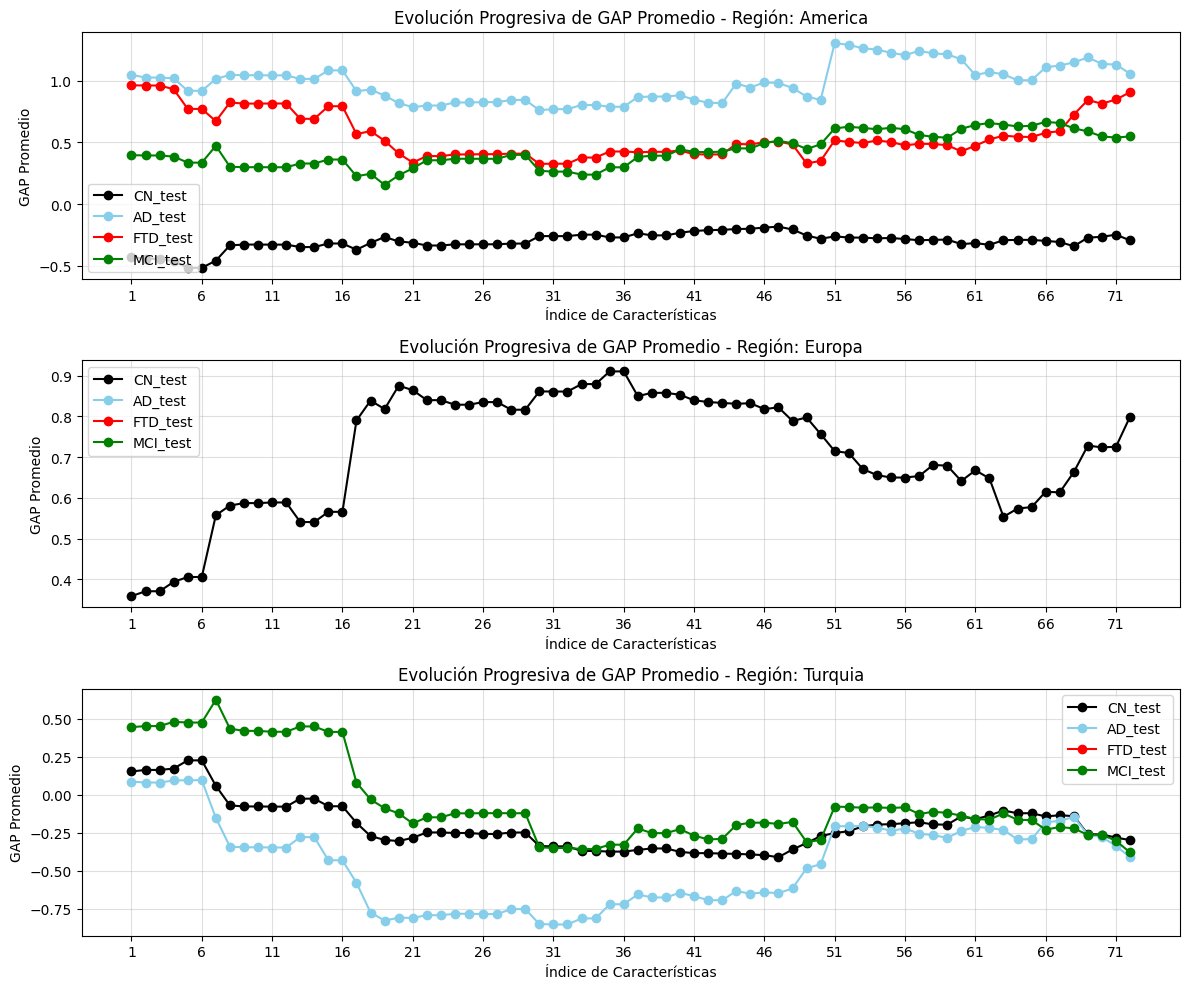

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Colores específicos para cada grupo
group_colors = {
    'CN_test_GAP_corrected': 'black',
    'AD_test_GAP_corrected': 'skyblue',
    'FTD_test_GAP_corrected': 'red',
    'MCI_test_GAP_corrected': 'green'
}

# Lista de regiones únicas en los datos
regiones = region_results_df['region'].unique()

# Crear figura para los gráficos por región
plt.figure(figsize=(12, 10))

# Iterar sobre las regiones para generar gráficos individuales
for i, region in enumerate(regiones, 1):
    # Filtrar datos por región
    region_data = region_results_df[region_results_df['region'] == region]
    
    # Calcular los promedios de GAP por característica y grupo
    gap_means = region_data.iloc[:, 2:].applymap(lambda x: sum(x) / len(x) if isinstance(x, list) and len(x) > 0 else None)
    
    # Crear un rango numérico para el eje x
    x_range = range(1, len(region_data['features']) + 1)
    x_ticks = range(1, len(region_data['features']) + 1, 5)  # Ticks cada 5
    
    # Gráfico para cada región
    plt.subplot(len(regiones), 1, i)  # Crear una subfigura por región
    for group in gap_means.columns:
        if group in group_colors:
            plt.plot(
                x_range,
                gap_means[group],
                label=group.replace('_GAP_corrected', ''),  # Simplificar etiquetas
                marker='o',
                color=group_colors[group]
            )
    
    plt.title(f'Evolución Progresiva de GAP Promedio - Región: {region}')
    plt.xlabel('Índice de Características')
    plt.ylabel('GAP Promedio')
    plt.xticks(ticks=x_ticks, labels=x_ticks, rotation=0)
    plt.legend()
    plt.grid(alpha=0.4)

plt.tight_layout()
plt.show()


In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear dataframes de resultados promedio
gap_means = pd.DataFrame({
    feature: {
        'CN_train': df['CN_train'].mean(),
        'CN_test': df['CN_test'].mean(),
        'AD_test': df['AD_test'].mean(),
        'FTD_test': df['FTD_test'].mean(),
        'MCI_test': df['MCI_test'].mean(),
    }
    for feature, df in results_GAP_corrected_df.items()
}).T  # Transponer para mejor estructura

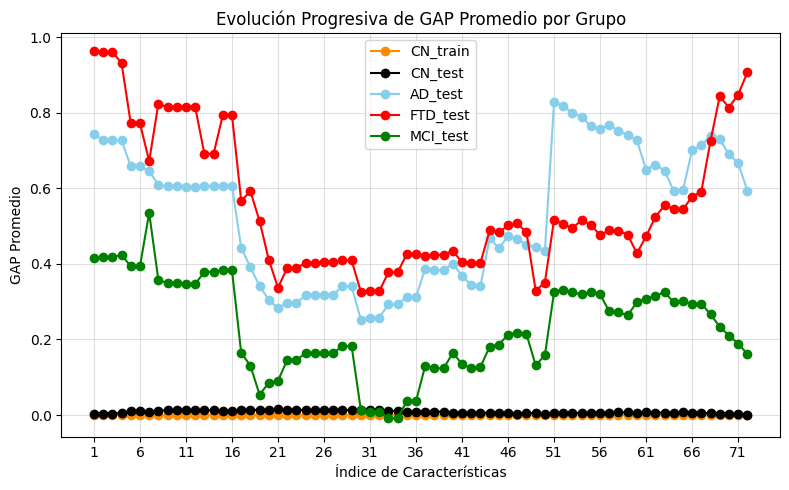

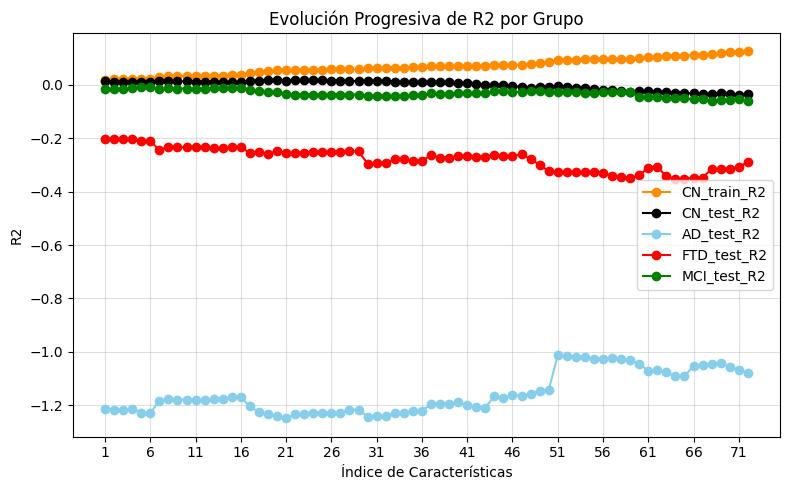

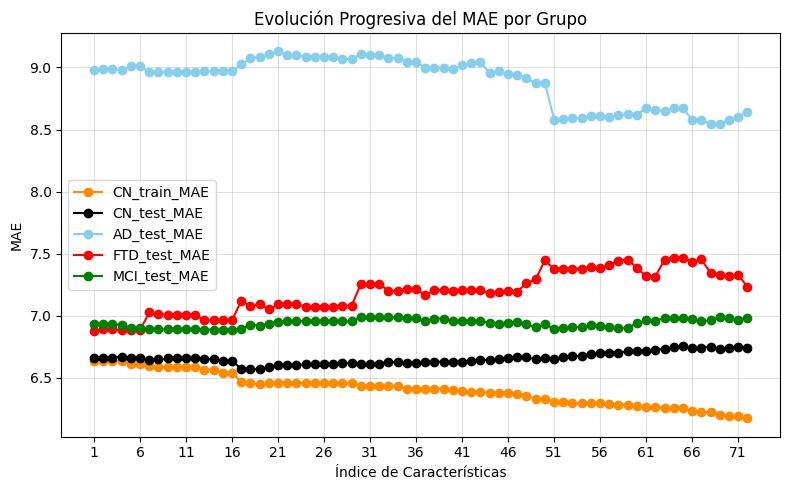

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear dataframes de resultados promedio
gap_means = pd.DataFrame({
    feature: {
        'CN_train': df['CN_train'].mean(),
        'CN_test': df['CN_test'].mean(),
        'AD_test': df['AD_test'].mean(),
        'FTD_test': df['FTD_test'].mean(),
        'MCI_test': df['MCI_test'].mean(),
    }
    for feature, df in results_GAP_corrected_df.items()
}).T  # Transponer para mejor estructura

# Crear un rango numérico para el eje x
x_range = range(1, len(gap_means.index) + 1)
x_ticks = range(1, len(gap_means.index) + 1, 5)  # Ticks cada 5

# Colores específicos para cada grupo
group_colors = {
    'CN_train': 'darkorange',
    'CN_test': 'black',
    'AD_test': 'skyblue',
    'FTD_test': 'red',
    'MCI_test': 'green'
}

# Gráfico de evolución de los GAP promedio
plt.figure(figsize=(8, 5))
for group in gap_means.columns:
    if group in group_colors:  # Verificar que el grupo tenga un color definido
        plt.plot(x_range, gap_means[group], label=group, marker='o', color=group_colors[group])
plt.title('Evolución Progresiva de GAP Promedio por Grupo')
plt.xlabel('Índice de Características')
plt.ylabel('GAP Promedio')
plt.xticks(ticks=x_ticks, labels=x_ticks, rotation=0)  # Etiquetas cada 5
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

# Gráfico de evolución del R2
r2_df = evaluation_metrics_df[['features', 'CN_train_R2', 'CN_test_R2', 'AD_test_R2', 'FTD_test_R2', 'MCI_test_R2']].set_index('features')
x_range_r2 = range(1, len(r2_df.index) + 1)
x_ticks_r2 = range(1, len(r2_df.index) + 1, 5)

plt.figure(figsize=(8, 5))
for group in r2_df.columns:
    if group.replace('_R2', '') in group_colors:  # Ajustar la clave para coincidir con el diccionario
        plt.plot(x_range_r2, r2_df[group], label=group, marker='o', color=group_colors[group.replace('_R2', '')])
plt.title('Evolución Progresiva de R2 por Grupo')
plt.xlabel('Índice de Características')
plt.ylabel('R2')
plt.xticks(ticks=x_ticks_r2, labels=x_ticks_r2, rotation=0)
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

# Gráfico de evolución del MAE
mae_df = evaluation_metrics_df[['features', 'CN_train_MAE', 'CN_test_MAE', 'AD_test_MAE', 'FTD_test_MAE', 'MCI_test_MAE']].set_index('features')
x_range_mae = range(1, len(mae_df.index) + 1)
x_ticks_mae = range(1, len(mae_df.index) + 1, 5)

plt.figure(figsize=(8, 5))
for group in mae_df.columns:
    if group.replace('_MAE', '') in group_colors:  # Ajustar la clave para coincidir con el diccionario
        plt.plot(x_range_mae, mae_df[group], label=group, marker='o', color=group_colors[group.replace('_MAE', '')])
plt.title('Evolución Progresiva del MAE por Grupo')
plt.xlabel('Índice de Características')
plt.ylabel('MAE')
plt.xticks(ticks=x_ticks_mae, labels=x_ticks_mae, rotation=0)
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


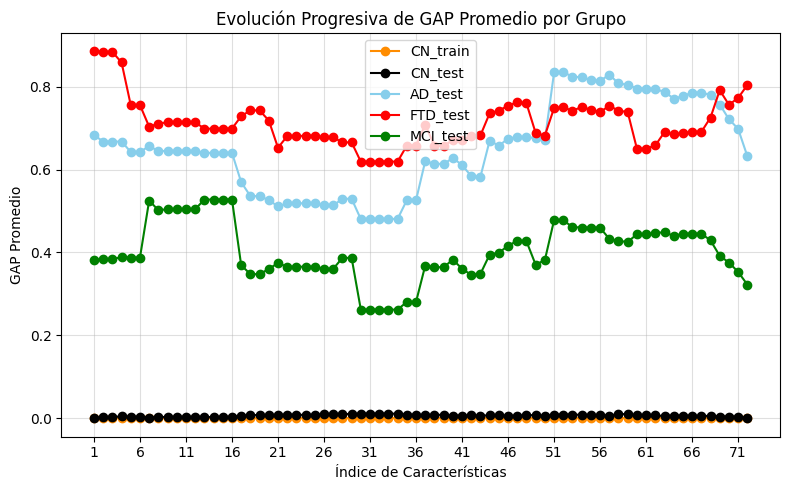

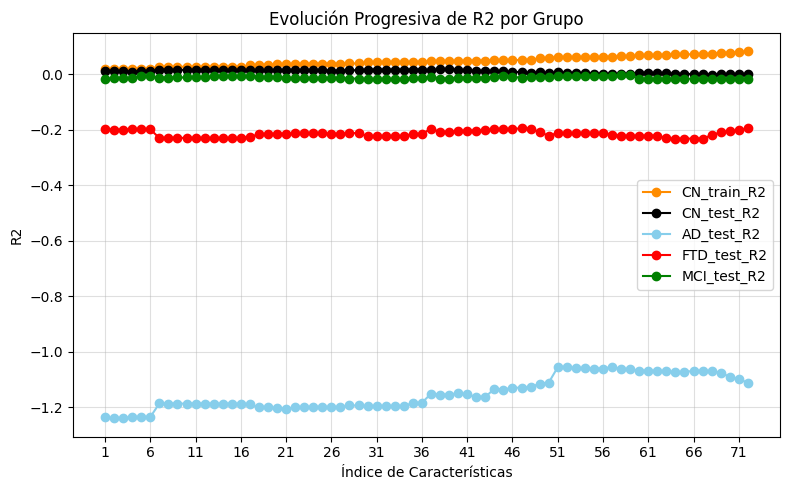

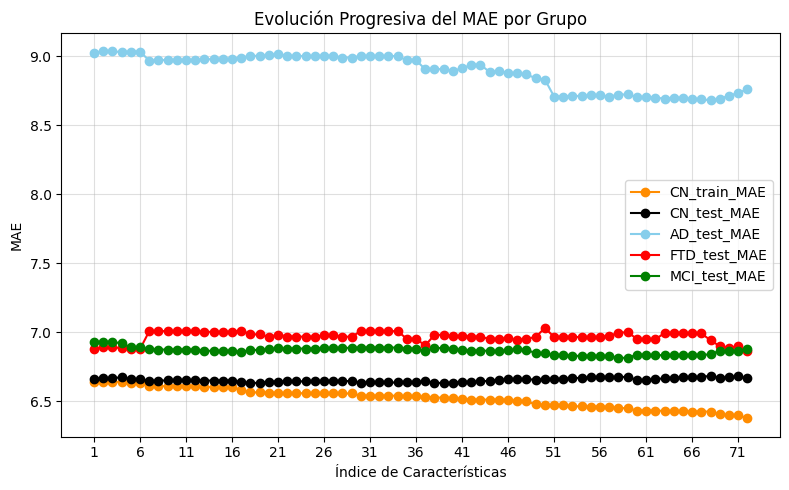

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear dataframes de resultados promedio
gap_means = pd.DataFrame({
    feature: {
        'CN_train': df['CN_train'].mean(),
        'CN_test': df['CN_test'].mean(),
        'AD_test': df['AD_test'].mean(),
        'FTD_test': df['FTD_test'].mean(),
        'MCI_test': df['MCI_test'].mean(),
    }
    for feature, df in results_GAP_corrected_df.items()
}).T  # Transponer para mejor estructura

# Crear un rango numérico para el eje x
x_range = range(1, len(gap_means.index) + 1)
x_ticks = range(1, len(gap_means.index) + 1, 5)  # Ticks cada 5

# Colores específicos para cada grupo
group_colors = {
    'CN_train': 'darkorange',
    'CN_test': 'black',
    'AD_test': 'skyblue',
    'FTD_test': 'red',
    'MCI_test': 'green'
}

# Gráfico de evolución de los GAP promedio
plt.figure(figsize=(8, 5))
for group in gap_means.columns:
    if group in group_colors:  # Verificar que el grupo tenga un color definido
        plt.plot(x_range, gap_means[group], label=group, marker='o', color=group_colors[group])
plt.title('Evolución Progresiva de GAP Promedio por Grupo')
plt.xlabel('Índice de Características')
plt.ylabel('GAP Promedio')
plt.xticks(ticks=x_ticks, labels=x_ticks, rotation=0)  # Etiquetas cada 5
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

# Gráfico de evolución del R2
r2_df = evaluation_metrics_df[['features', 'CN_train_R2', 'CN_test_R2', 'AD_test_R2', 'FTD_test_R2', 'MCI_test_R2']].set_index('features')
x_range_r2 = range(1, len(r2_df.index) + 1)
x_ticks_r2 = range(1, len(r2_df.index) + 1, 5)

plt.figure(figsize=(8, 5))
for group in r2_df.columns:
    if group.replace('_R2', '') in group_colors:  # Ajustar la clave para coincidir con el diccionario
        plt.plot(x_range_r2, r2_df[group], label=group, marker='o', color=group_colors[group.replace('_R2', '')])
plt.title('Evolución Progresiva de R2 por Grupo')
plt.xlabel('Índice de Características')
plt.ylabel('R2')
plt.xticks(ticks=x_ticks_r2, labels=x_ticks_r2, rotation=0)
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

# Gráfico de evolución del MAE
mae_df = evaluation_metrics_df[['features', 'CN_train_MAE', 'CN_test_MAE', 'AD_test_MAE', 'FTD_test_MAE', 'MCI_test_MAE']].set_index('features')
x_range_mae = range(1, len(mae_df.index) + 1)
x_ticks_mae = range(1, len(mae_df.index) + 1, 5)

plt.figure(figsize=(8, 5))
for group in mae_df.columns:
    if group.replace('_MAE', '') in group_colors:  # Ajustar la clave para coincidir con el diccionario
        plt.plot(x_range_mae, mae_df[group], label=group, marker='o', color=group_colors[group.replace('_MAE', '')])
plt.title('Evolución Progresiva del MAE por Grupo')
plt.xlabel('Índice de Características')
plt.ylabel('MAE')
plt.xticks(ticks=x_ticks_mae, labels=x_ticks_mae, rotation=0)
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


# Reg 0.001

C:\Users\felip\AppData\Local\Temp\ipykernel_44668\1592845111.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  gap_means = region_data.iloc[:, 2:].applymap(lambda x: sum(x) / len(x) if isinstance(x, list) and len(x) > 0 else None)
C:\Users\felip\AppData\Local\Temp\ipykernel_44668\1592845111.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  gap_means = region_data.iloc[:, 2:].applymap(lambda x: sum(x) / len(x) if isinstance(x, list) and len(x) > 0 else None)
C:\Users\felip\AppData\Local\Temp\ipykernel_44668\1592845111.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  gap_means = region_data.iloc[:, 2:].applymap(lambda x: sum(x) / len(x) if isinstance(x, list) and len(x) > 0 else None)


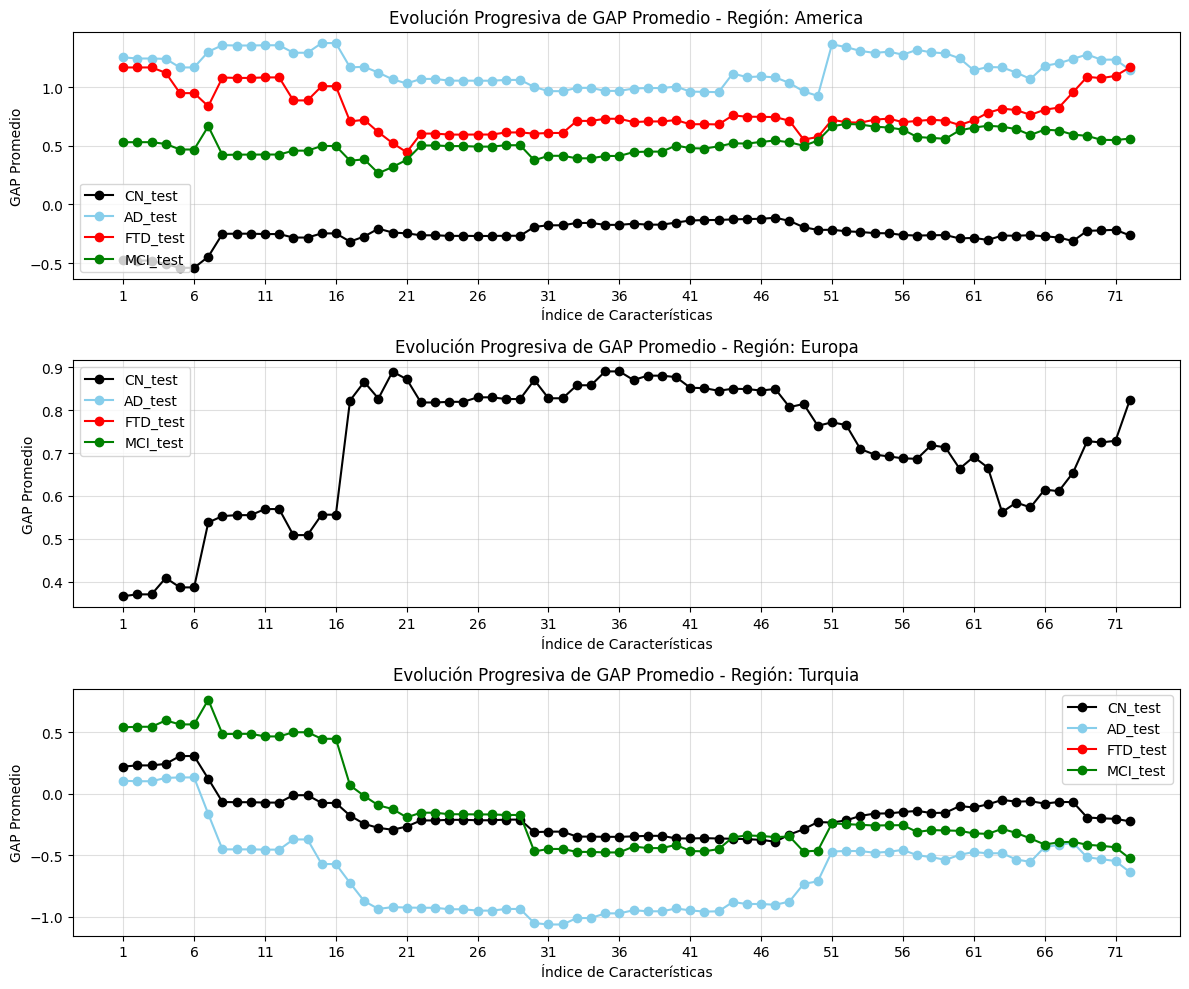

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Colores específicos para cada grupo
group_colors = {
    'CN_test_GAP_corrected': 'black',
    'AD_test_GAP_corrected': 'skyblue',
    'FTD_test_GAP_corrected': 'red',
    'MCI_test_GAP_corrected': 'green'
}

# Lista de regiones únicas en los datos
regiones = region_results_df['region'].unique()

# Crear figura para los gráficos por región
plt.figure(figsize=(12, 10))

# Iterar sobre las regiones para generar gráficos individuales
for i, region in enumerate(regiones, 1):
    # Filtrar datos por región
    region_data = region_results_df[region_results_df['region'] == region]
    
    # Calcular los promedios de GAP por característica y grupo
    gap_means = region_data.iloc[:, 2:].applymap(lambda x: sum(x) / len(x) if isinstance(x, list) and len(x) > 0 else None)
    
    # Crear un rango numérico para el eje x
    x_range = range(1, len(region_data['features']) + 1)
    x_ticks = range(1, len(region_data['features']) + 1, 5)  # Ticks cada 5
    
    # Gráfico para cada región
    plt.subplot(len(regiones), 1, i)  # Crear una subfigura por región
    for group in gap_means.columns:
        if group in group_colors:
            plt.plot(
                x_range,
                gap_means[group],
                label=group.replace('_GAP_corrected', ''),  # Simplificar etiquetas
                marker='o',
                color=group_colors[group]
            )
    
    plt.title(f'Evolución Progresiva de GAP Promedio - Región: {region}')
    plt.xlabel('Índice de Características')
    plt.ylabel('GAP Promedio')
    plt.xticks(ticks=x_ticks, labels=x_ticks, rotation=0)
    plt.legend()
    plt.grid(alpha=0.4)

plt.tight_layout()
plt.show()
